# Taller Gradiente Descendiente.

Implemente las siguientes funciones para desarrollar el algoritmo del gradiente descendente:

* `sigmoide`: funcion sigmoide como funcion de activacion.
* `prediccion`: la formula para la preduccion.
* `error`: la formula para el error en un punto.
* `peso_updt`: la funcion que actualiza lso paramentros con un paso del gradiente descendente.

El objetivo del taller es encontrar la linea optima de clasificacion de los datos.

-Despues de implementar las funciones del grandiente descendente, corra la funcion de entrenamiento. Esto hace que se grafiquen las lineas generadas en cada paso del algortimo del gradiente. Tambien se grafica la funcion error y podra observar como esta disminuye a medida que las epocas se incrementan.



In [137]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#funciones para graficar y dibujar lineas.

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

## Leyendo y graficando los datos.

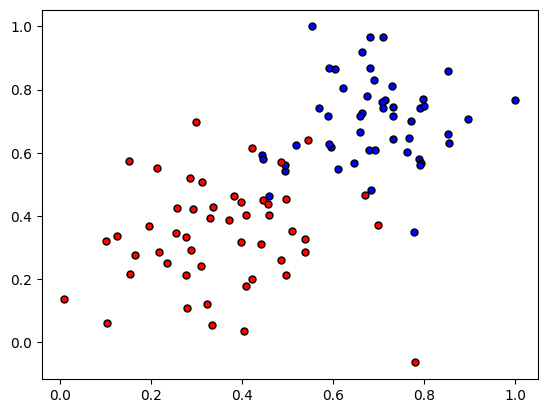

In [138]:
data = pd.read_csv('data.csv',header= None )
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

## Funciones basicas a implementar

Implemente las siguientes funciones.
- Funcion de activacion sigmoide

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Prediccion 

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Funcion error

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- Funcion para actualizar los pesos

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [139]:
# satarter parameter
W = [0.5,0.5]  #starter weights
b =0  #starter bias

# Activation (sigmoid) function
def sigmoid(score):
    return np.exp(score)/(1+np.exp(score))

# Output (prediction) formula
def prediccion(X, W, b):
    return sigmoid((np.matmul(X,W)+b))

# Error (log-loss) formula
def error_formula(y, output):
        return - np.mean(y * np.log(output) + (1 - y) * np.log(1 - output))

  

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
   
    n_samples = X.shape[0]

    # Calcula las derivadas parciales de la función de costo
    # con respecto a cada peso y al sesgo
    d_weights = np.zeros(weights.shape)
    d_bias = 0
    for i in range(n_samples):
        # Calcula la predicción para la muestra i
        y_pred = np.dot(X[i], weights) + bias

        # Calcula la diferencia entre la predicción y el objetivo
        error = y - y_pred

        # Calcula la derivada parcial de la función de costo con respecto
        # a cada peso y al sesgo para la muestra i
        d_weights += error * X[i]
        d_bias += error

    # Actualiza los pesos y el sesgo utilizando las derivadas parciales
    weights += (learnrate / n_samples) * d_weights
    bias += (learnrate / n_samples) * d_bias

    return weights, bias


## Funcion de entrenamiento
Esta funcion hace una interacion del algoritmo del gradiente descendente en todos los datos, para un numero determinado de epocas y algunas lineas limite a medida que avanza el algoritmo.

In [144]:
np.random.seed(44)

epochs = 300
learnrate = 0.1

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = prediccion(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = prediccion(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

## Entrenamiento del algoritmo
Cuando corremos la funcion, se obtiene lo siguiente:
- 10 actualizaciones con perdidas del entrenamiento actual y precision.
- Un plot de los datos y las lineas de clasficacion que se obtienen. La final queda en negro. Entre mas epocas, las lineas se ajustan cada vez mejor =
- Un plot de la funcion error. Note que a medida que avanza las epocas, esta disminuye.


========== Epoch 0 ==========
Train loss:  0.6990534028082682
Accuracy:  0.48

========== Epoch 30 ==========
Train loss:  0.6679302419261219
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.6679421527292511   WARNING - Loss Increasing
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.6679421965436668   WARNING - Loss Increasing
Accuracy:  0.93

========== Epoch 120 ==========
Train loss:  0.6679421967044996   WARNING - Loss Increasing
Accuracy:  0.93

========== Epoch 150 ==========
Train loss:  0.6679421967050898   WARNING - Loss Increasing
Accuracy:  0.93

========== Epoch 180 ==========
Train loss:  0.667942196705092   WARNING - Loss Increasing
Accuracy:  0.93

========== Epoch 210 ==========
Train loss:  0.667942196705092
Accuracy:  0.93

========== Epoch 240 ==========
Train loss:  0.667942196705092
Accuracy:  0.93

========== Epoch 270 ==========
Train loss:  0.667942196705092
Accuracy:  0.93


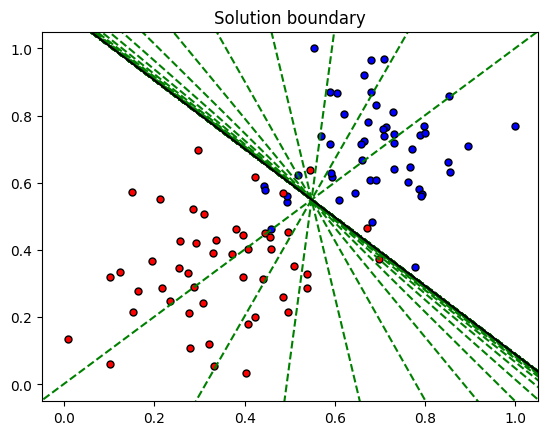

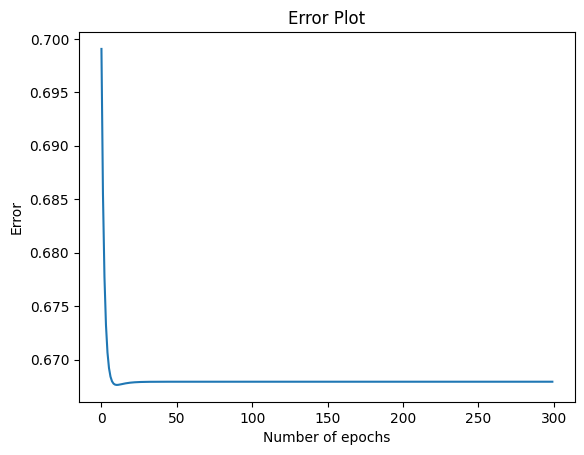

In [145]:
train(X, y, epochs, learnrate, True)